In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('forestfires.xlsx',sheet_name='forestfires dataset')

In [3]:
df.head()

,X,Y,Month,Day,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,Area
0,7,5,Mar,Fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,Oct,Tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,Oct,Sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,Mar,Fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,Mar,Sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.columns

Index(['X', 'Y', 'Month', 'Day', 'FFMC', 'DMC', 'DC', 'ISI', 'Temp', 'RH',
       'Wind', 'Rain', 'Area'],
      dtype='object')

In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,Area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
Month    517 non-null object
Day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
Temp     517 non-null float64
RH       517 non-null int64
Wind     517 non-null float64
Rain     517 non-null float64
Area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**Rows for which Area is maximum. Take a query for that**

In [75]:
df[df['Area'] == df['Area'].max()]

,X,Y,Month,Day,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,Area
238,6,5,11,Sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84


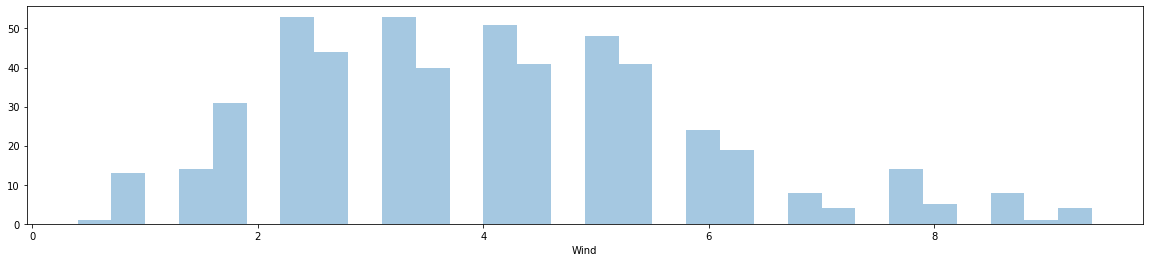

In [7]:
plt.figure(figsize=(20,4))
sns.distplot(df['Wind'],bins = 30,kde=False)

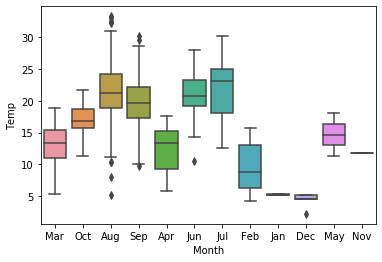

In [8]:
sns.boxplot(x=df['Month'],y=df['Temp'])

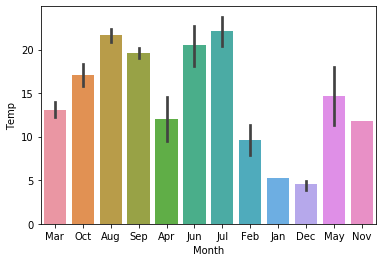

In [9]:
sns.barplot(y=df['Temp'],x=df['Month'])

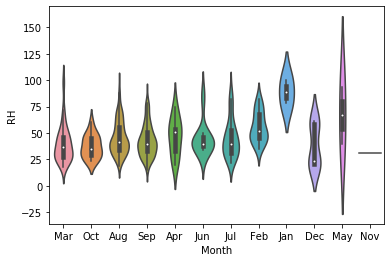

In [10]:
sns.violinplot(y=df['RH'],x=df['Month'])

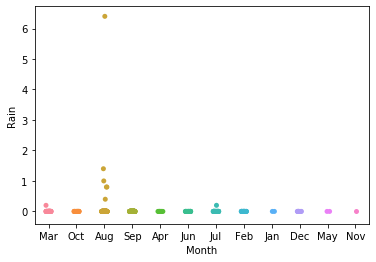

In [11]:
sns.stripplot(y=df['Rain'],x=df['Month'])

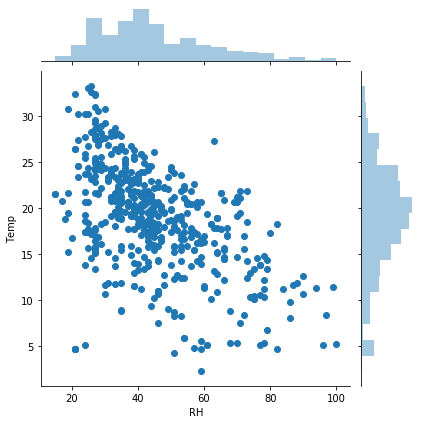

In [12]:
sns.jointplot(x=df['RH'],y=df['Temp'])

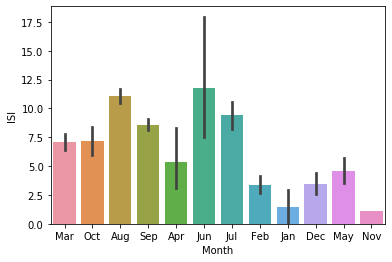

In [13]:
sns.barplot(y=df['ISI'],x=df['Month'])

In [14]:
# 2. The month that recorded highest windspeed.
df[df['Wind'] == df['Wind'].max()]['Month']

168    Mar
411    Feb
469    Apr
475    Jun
Name: Month, dtype: object

In [15]:
#3. The month that recorded highest rainfall
df[df['Rain'] == df['Rain'].max()]['Month']

499    Aug
Name: Month, dtype: object

In [16]:
#4. value of (X, Y) for maximum temperature.
print("X : ")
print(df[df['Temp'] == df['Temp'].max()]['X'])
print("Y : ")
print(df[df['Temp'] == df['Temp'].max()]['Y'])


X : 
498    6
Name: X, dtype: int64
Y : 
498    5
Name: Y, dtype: int64


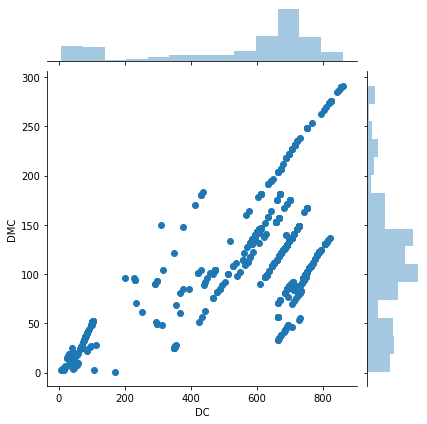

In [17]:
# 5. Relationship between DC and DMC.
sns.jointplot(df['DC'], df['DMC'])

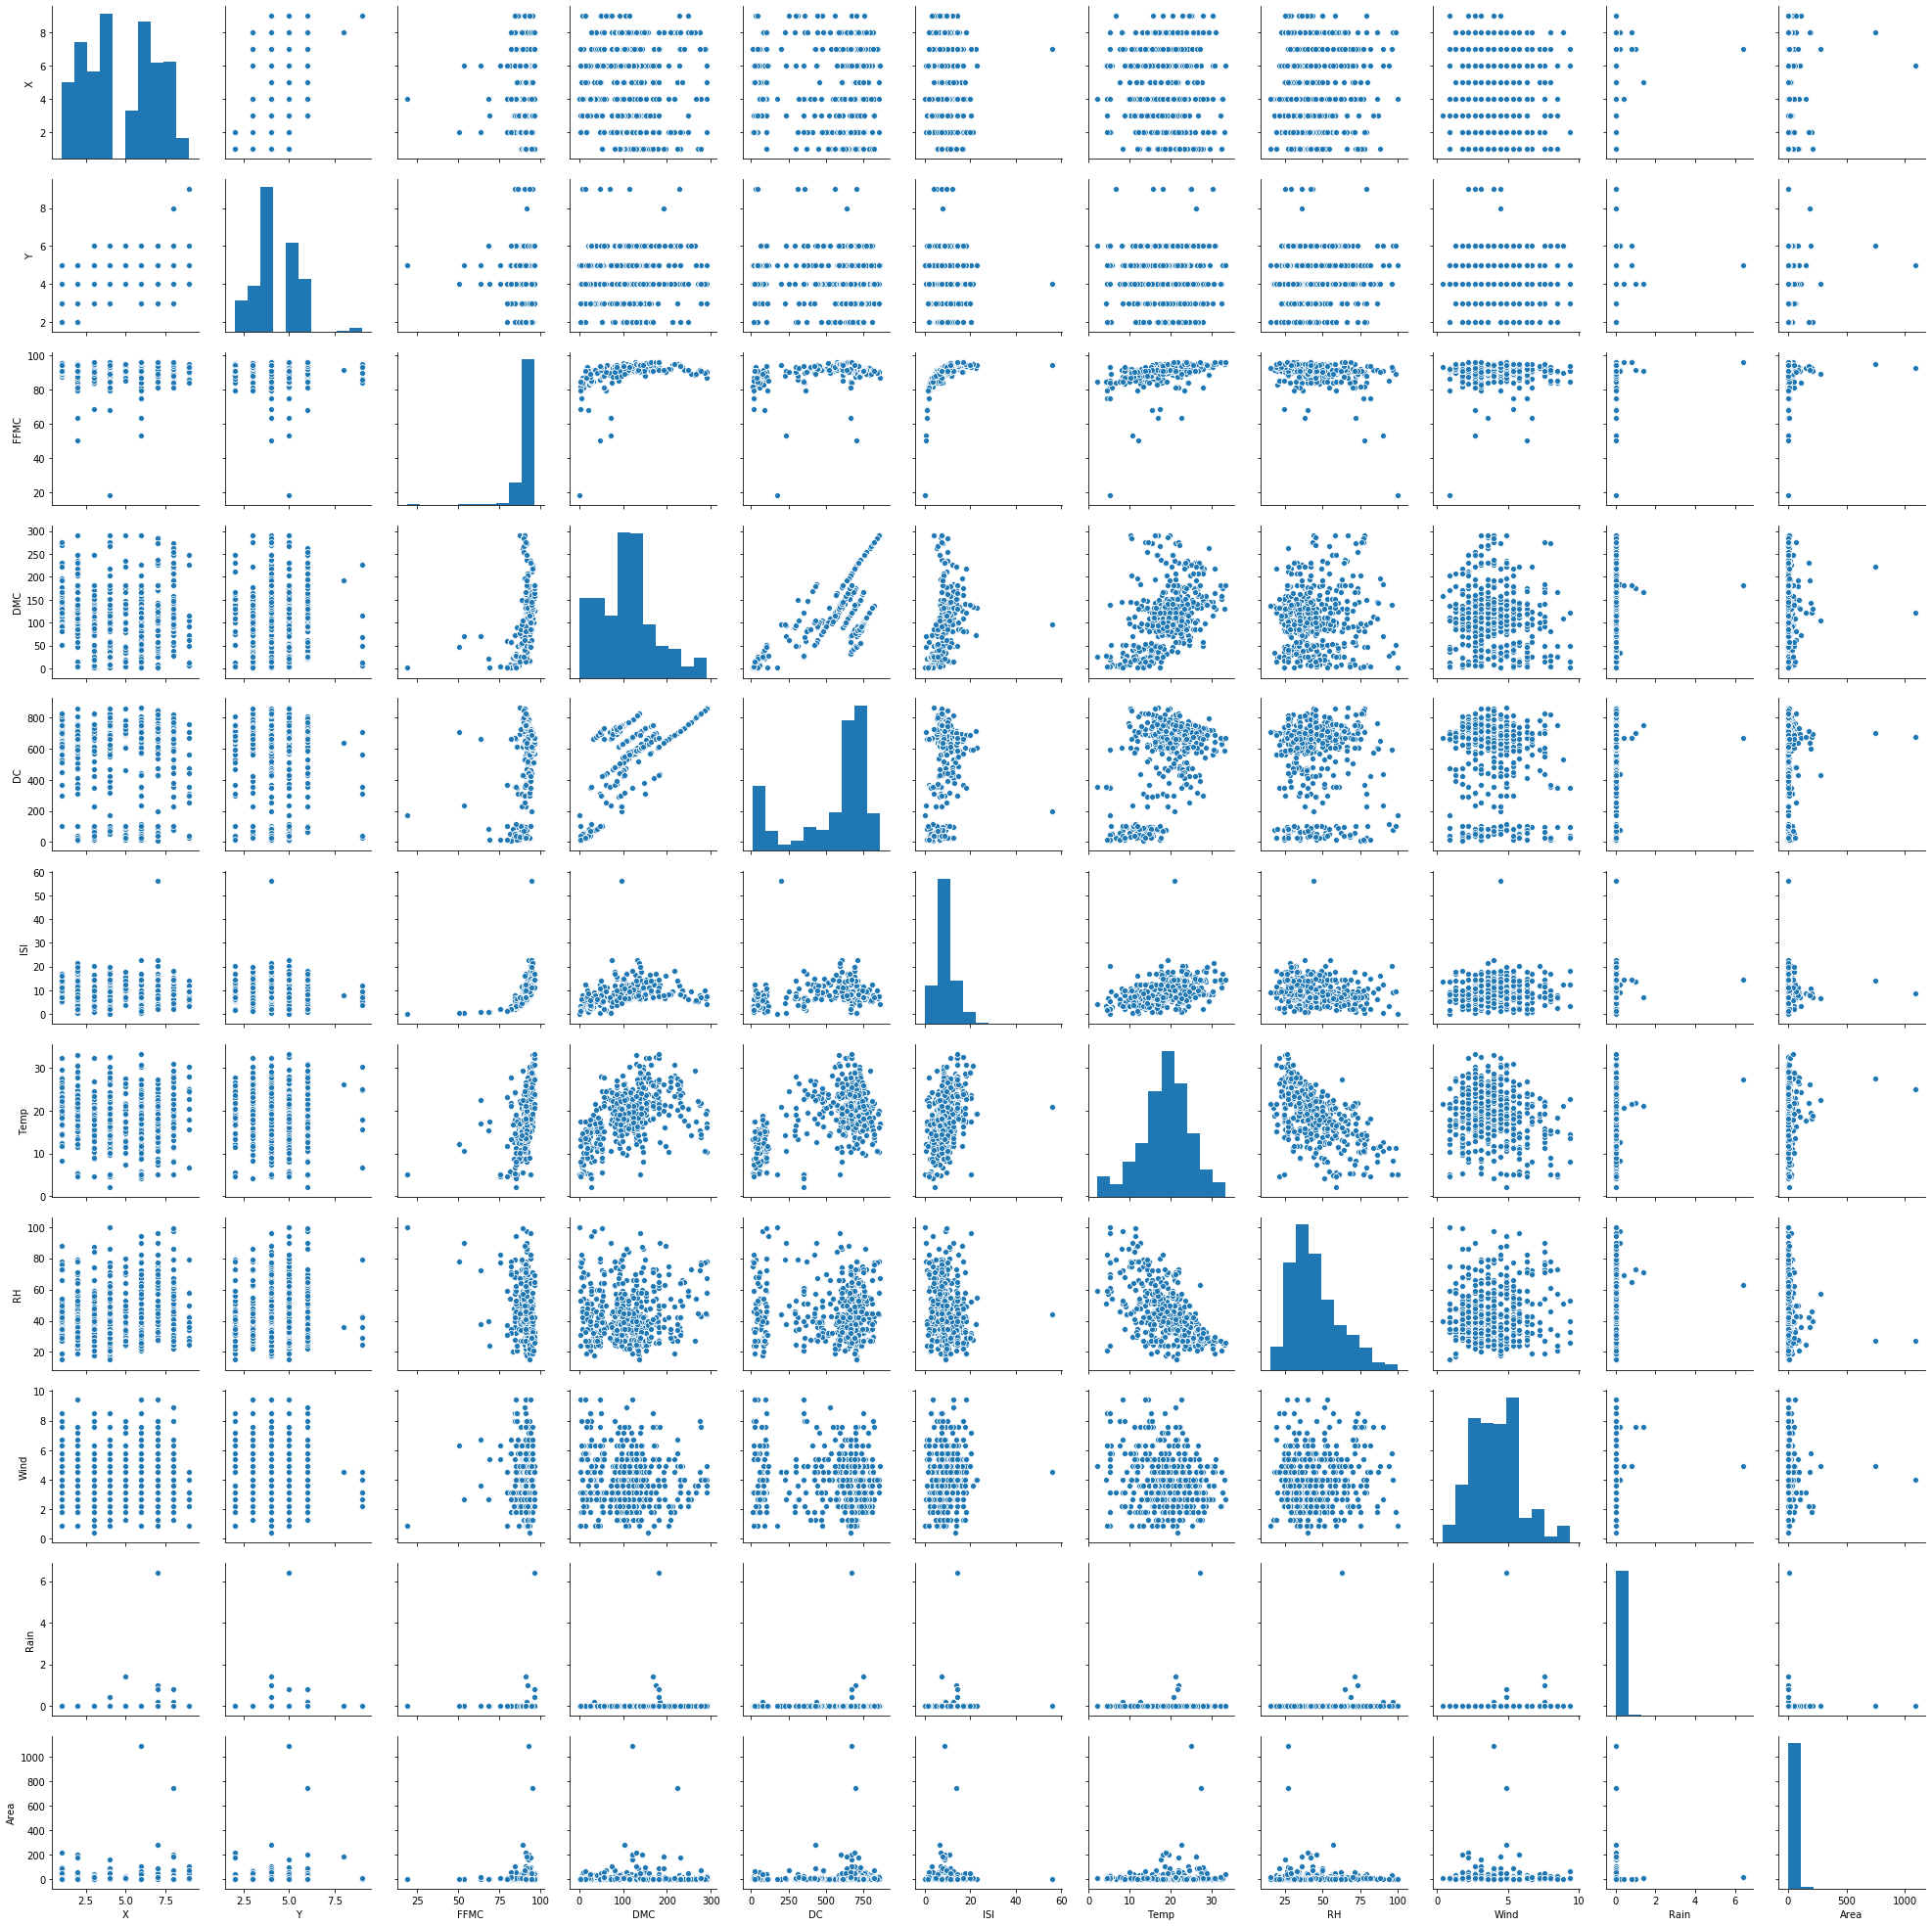

In [14]:
sns.pairplot(df)

In [29]:
df.head(3)

,X,Y,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0


In [24]:
day = pd.get_dummies(df["Day"], drop_first=True)
month = pd.get_dummies(df["Month"], drop_first=True)

In [26]:
df.drop(['Month', "Day"], axis= 1, inplace=True)

In [28]:
df = pd.concat([df, month, day], axis = 1)

In [18]:
from sklearn.model_selection import train_test_split        #from sklearn.cross_validation import train_test_split (jupyter notebooks)
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Scenario 1

 **Forest fires are caused due to Temp and Wind**

#### Predicting Temp

In [31]:
X = df.drop("Temp", axis = 1)
y = df['Temp']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print("\nLinear Model Intercept : ",lm.intercept_)


Linear Model Intercept :  21.80211591366005


In [34]:
print("\nCoefficients Value: ",lm.coef_)


Coefficients Value:  [-1.61827486e-02  1.72363263e-01  1.29206972e-02  7.12952525e-03
  3.23547954e-04  9.76279607e-03 -2.06533998e-01 -1.63921423e-01
  1.92604495e+00  1.32565422e-03  6.55764544e+00 -9.08272917e+00
 -1.66077518e+00  2.66554237e+00  7.59289377e+00  6.12195533e+00
 -1.81747885e+00  3.19328192e+00  3.55271368e-15  1.63209452e+00
  4.59529660e+00 -8.61366727e-01 -5.28018662e-02  4.31269884e-01
 -1.39493926e+00 -1.16300593e+00  2.52636011e-01]


In [38]:
#cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['Coeff'])
#print("\nDataFrame coefficient for x_train\n",cdf)


In [39]:
predictions = lm.predict(X_test)

#print("\nPredictions as per x_test : \n",predictions)       #Predicted Price

In [40]:
#print("Predictions as per y_test : \n",y_test)         #Actual price

Plot for difference between actual values and estimated values


Text(0.5, 1.0, 'Scatter Plot')

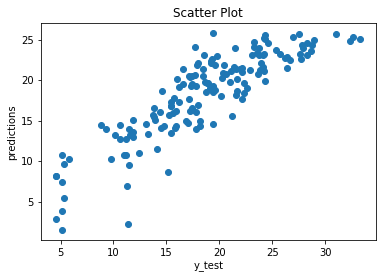

In [41]:
print("Plot for difference between actual values and estimated values")
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.title("Scatter Plot")

Text(0.5, 1.0, 'Distribution Plot')

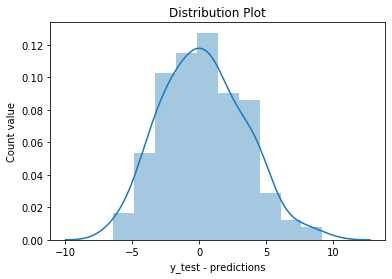

In [42]:
sns.distplot((y_test - predictions))        
plt.xlabel("y_test - predictions")
plt.ylabel("Count value")
plt.title("Distribution Plot")


In [47]:
print("\nMean Absolute Error : ",metrics.mean_absolute_error(y_test,predictions))
print("\nMean Squared Error : ",metrics.mean_squared_error(y_test,predictions))
print("\nSquareroot of Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("\nR2 Squared score : ",metrics.r2_score(y_test,predictions))


Mean Absolute Error :  2.477351360392242

Mean Squared Error :  9.507577630769097

Squareroot of Mean Squared Error :  3.08343601048718

R2 Squared score :  0.7557356233594765


#### Predicting Wind

In [48]:
X = df.drop("Wind", axis = 1)
y = df['Wind']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print("\nLinear Model Intercept : ",lm.intercept_)


Linear Model Intercept :  9.399226409456173


In [51]:
print("\nCoefficients Value: ",lm.coef_)


Coefficients Value:  [ 2.87582596e-02 -9.28638083e-02 -4.07935317e-02  9.63939399e-04
 -9.23409358e-05  9.00674590e-02 -6.07347038e-02 -9.06823535e-03
  4.04749325e-01  6.93063326e-04 -2.32731173e-01  2.42539205e+00
 -9.59392831e-01 -5.92456602e+00 -3.43427986e-01 -3.77462139e-01
  8.95272642e-01 -6.82345624e-01 -5.88418203e-14 -6.40108209e-01
 -6.13079501e-01 -9.74519577e-01 -4.77183171e-01 -2.25124448e-01
 -8.51508657e-01 -5.64067071e-01 -5.79841497e-01]


In [52]:
#cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['Coeff'])
#print("\nDataFrame coefficient for x_train\n",cdf)


In [53]:
predictions = lm.predict(X_test)

#print("\nPredictions as per x_test : \n",predictions)       #Predicted Price

In [54]:
#print("Predictions as per y_test : \n",y_test)         #Actual price

Plot for difference between actual values and estimated values


Text(0.5, 1.0, 'Scatter Plot')

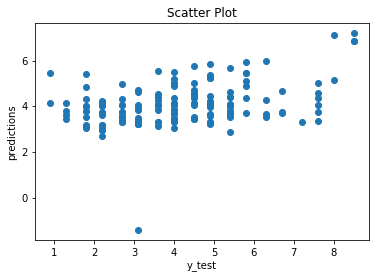

In [55]:
print("Plot for difference between actual values and estimated values")
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.title("Scatter Plot")

Text(0.5, 1.0, 'Distribution Plot')

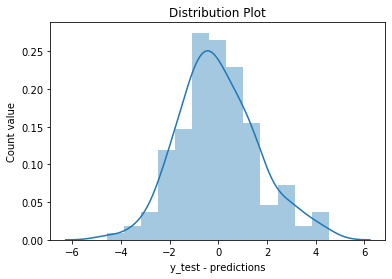

In [56]:
sns.distplot((y_test - predictions))        
plt.xlabel("y_test - predictions")
plt.ylabel("Count value")
plt.title("Distribution Plot")


In [57]:
print("\nMean Absolute Error : ",metrics.mean_absolute_error(y_test,predictions))
print("\nMean Squared Error : ",metrics.mean_squared_error(y_test,predictions))
print("\nSquareroot of Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("\nR2 Squared score : ",metrics.r2_score(y_test,predictions))


Mean Absolute Error :  1.2723555624950171

Mean Squared Error :  2.6060045738629127

Squareroot of Mean Squared Error :  1.614312415198159

R2 Squared score :  0.1470587885126018


## Scenario 2

In [58]:
df = pd.read_excel('forestfires.xlsx',sheet_name='forestfires dataset')

In [63]:
df.head(2)

,X,Y,Month,Day,FFMC,DMC,DC,ISI,Temp,RH,Wind,Rain,Area
0,7,5,7,Fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,Tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
label = LabelEncoder()

In [62]:
df["Month"] = label.fit_transform(df['Month'])

In [64]:
x = df.drop(['Day', "Month"], axis = 1)
y = df['Month']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print("\nLinear Model Intercept : ",lm.intercept_)


Linear Model Intercept :  -5.062616992290714e-14


In [67]:
print("\nCoefficients Value: ",lm.coef_)


Coefficients Value:  [ 6.45082715e-16 -1.20828815e-15  1.67819244e-16 -1.02206255e-16
  8.64265452e-17 -4.95747406e-17 -1.30643171e-17  1.76572455e-16
 -6.91716314e-15  1.00919342e-17  1.00000000e+00  2.00000000e+00
  3.00000000e+00  4.00000000e+00  5.00000000e+00  6.00000000e+00
  7.00000000e+00  8.00000000e+00  6.21724894e-15  1.00000000e+01
  1.10000000e+01 -2.21901563e-15  9.98119180e-16  2.74199259e-15
  2.30407195e-15  1.45970406e-15  7.68969234e-16]


In [68]:
#cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['Coeff'])
#print("\nDataFrame coefficient for x_train\n",cdf)


In [69]:
predictions = lm.predict(X_test)

#print("\nPredictions as per x_test : \n",predictions)       #Predicted Price

In [70]:
#print("Predictions as per y_test : \n",y_test)         #Actual price

Plot for difference between actual values and estimated values


Text(0.5, 1.0, 'Scatter Plot')

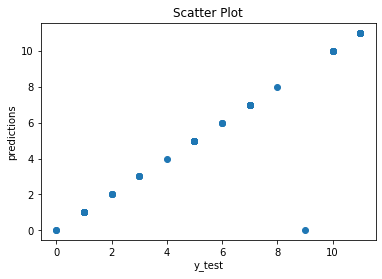

In [71]:
print("Plot for difference between actual values and estimated values")
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.title("Scatter Plot")

Text(0.5, 1.0, 'Distribution Plot')

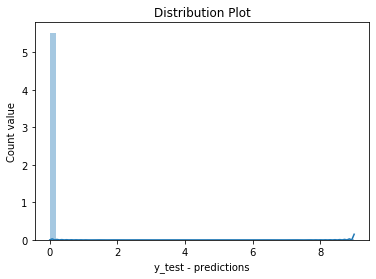

In [72]:
sns.distplot((y_test - predictions))        
plt.xlabel("y_test - predictions")
plt.ylabel("Count value")
plt.title("Distribution Plot")


In [73]:
print("\nMean Absolute Error : ",metrics.mean_absolute_error(y_test,predictions))
print("\nMean Squared Error : ",metrics.mean_squared_error(y_test,predictions))
print("\nSquareroot of Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("\nR2 Squared score : ",metrics.r2_score(y_test,predictions))


Mean Absolute Error :  0.05769230769232289

Mean Squared Error :  0.519230769230771

Squareroot of Mean Squared Error :  0.7205766921228933

R2 Squared score :  0.9719366509204538
